Analysis of Tennis Player Prize Money

By Harmony Allan-Mah, Brandon Hui, Leo Qu and Elena Zettelmeyer

Tennis (singles) is a game played between two players with rackets where they hit a tennis ball back and forth until one player hits it out of bounds. There are many types of statistics that can be recorded for tennis players; but only 3 of them (Age, Current Elo, Seasons) will be used as predictors during our analysis. These predictors will be elaborated on in the “methods” section of this proposal. In this project, we will operate on the “Player Stats for Top 500 Players” dataset, and answer the following predictive question:

How do age, current Elo, and seasons influence the prize money that a player can make? 


New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Seasons,Current.Elo.Rank,Best.Elo.Rank,Peak.Elo.Rating,Height,Current.Rank,Best.Rank,GOAT.Rank,Prize.Money
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,11,1826,21,2037,193,183,17,264,6091971
31,14,2211,3,2329,198,121,3,33,25889586
33,14,1791,29,2004,190,130,19,264,10821168
32,15,1993,18,2068,198,45,11,157,11912152
32,16,2004,14,2112,178,12,9,151,13470614
29,11,1892,35,1962,180,27,23,357,4850190
32,13,1860,44,1946,190,161,33,357,7114496
27,11,1845,38,1953,183,304,40,489,4660132
35,18,1879,21,2029,190,85,18,293,10581476


Age          Seasons Current.Elo.Rank    Best.Elo.Rank 
      0.18767662       0.42030470       0.77216326      -0.50019089 
 Peak.Elo.Rating           Height     Current.Rank        Best.Rank 
      0.84909376       0.02801205      -0.32429820      -0.49511756 
       GOAT.Rank      Prize.Money 
     -0.57507299       1.00000000

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)           Seasons      Current.Rank         Best.Rank  
      -511240284           2122803            -31484           -132710  
 Peak.Elo.Rating         GOAT.Rank     Best.Elo.Rank  Current.Elo.Rank  
          182990             55943            806865             46052  


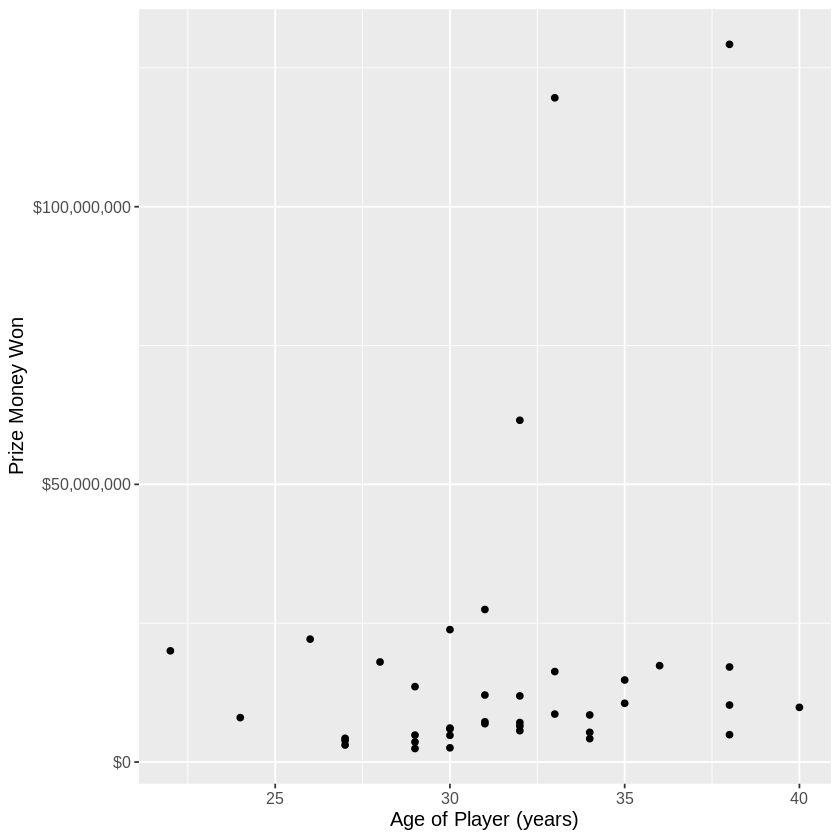

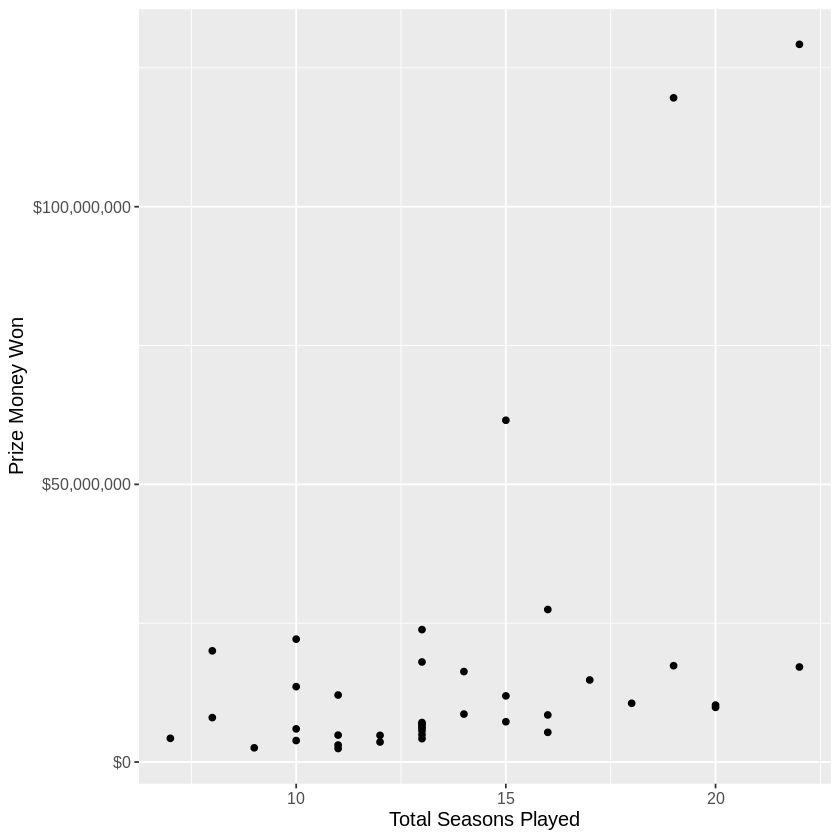

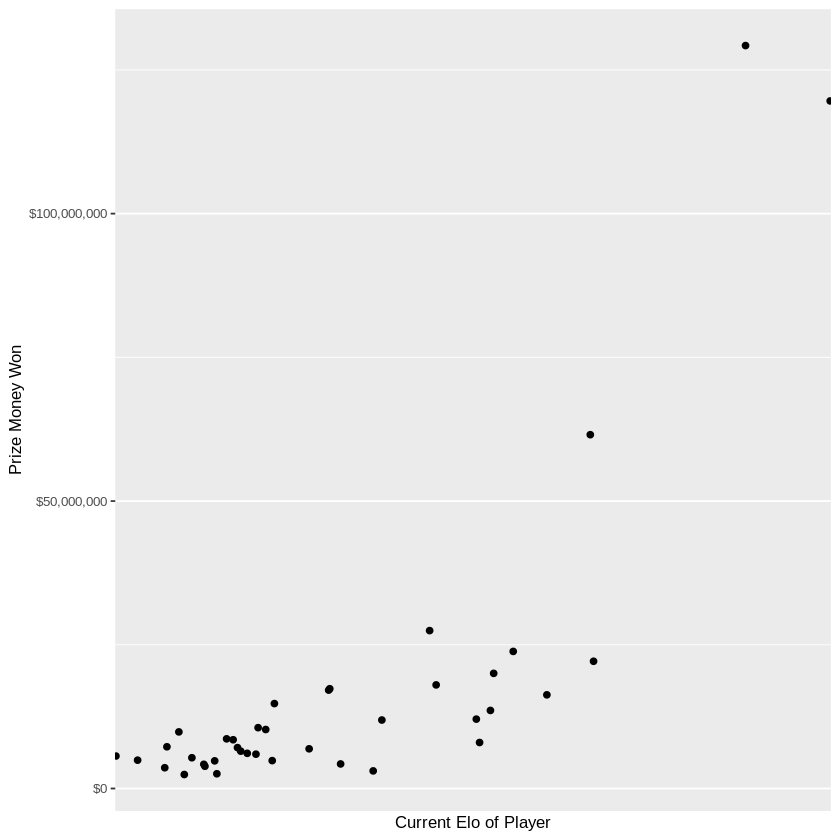

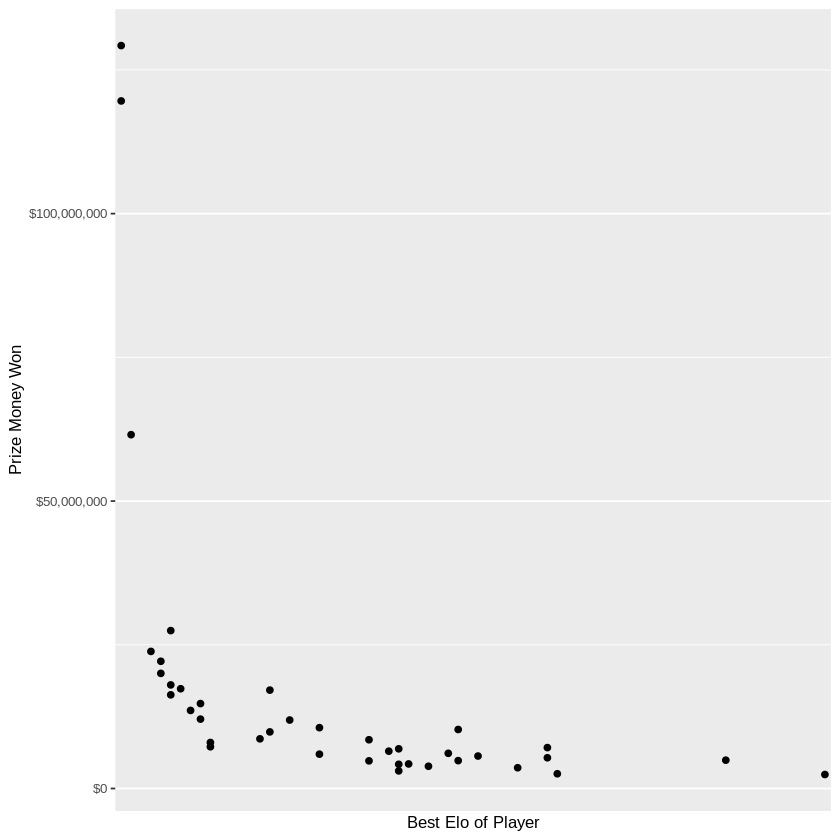

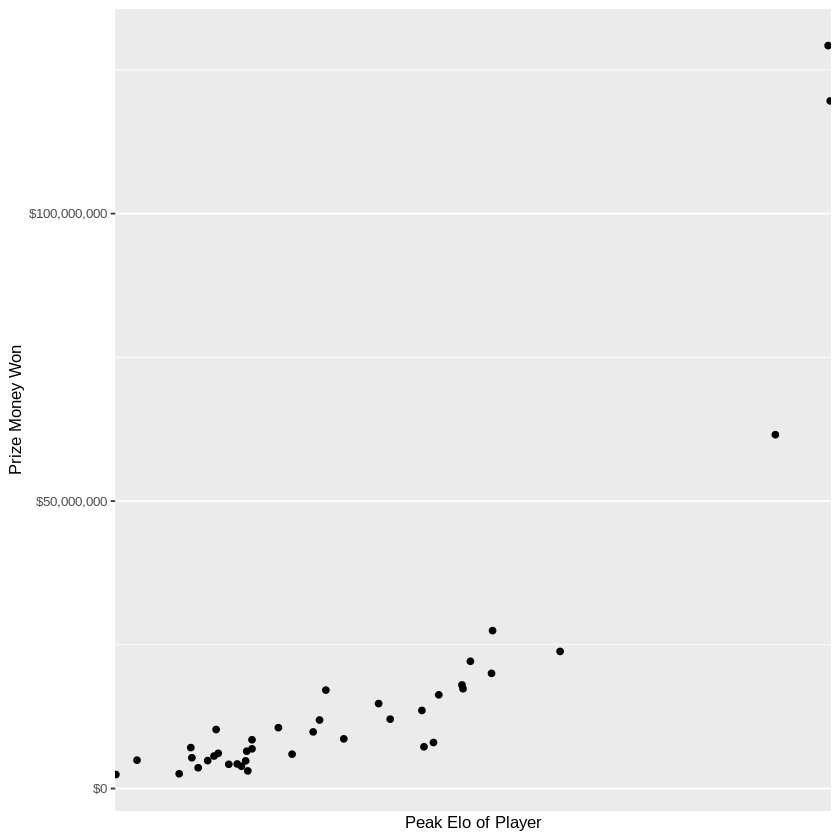

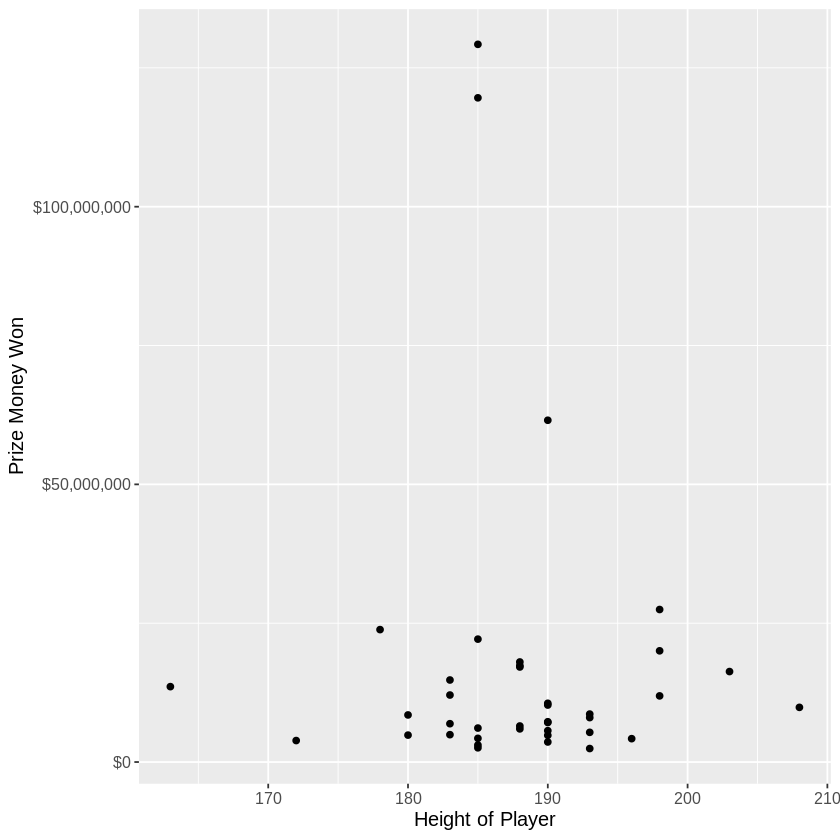

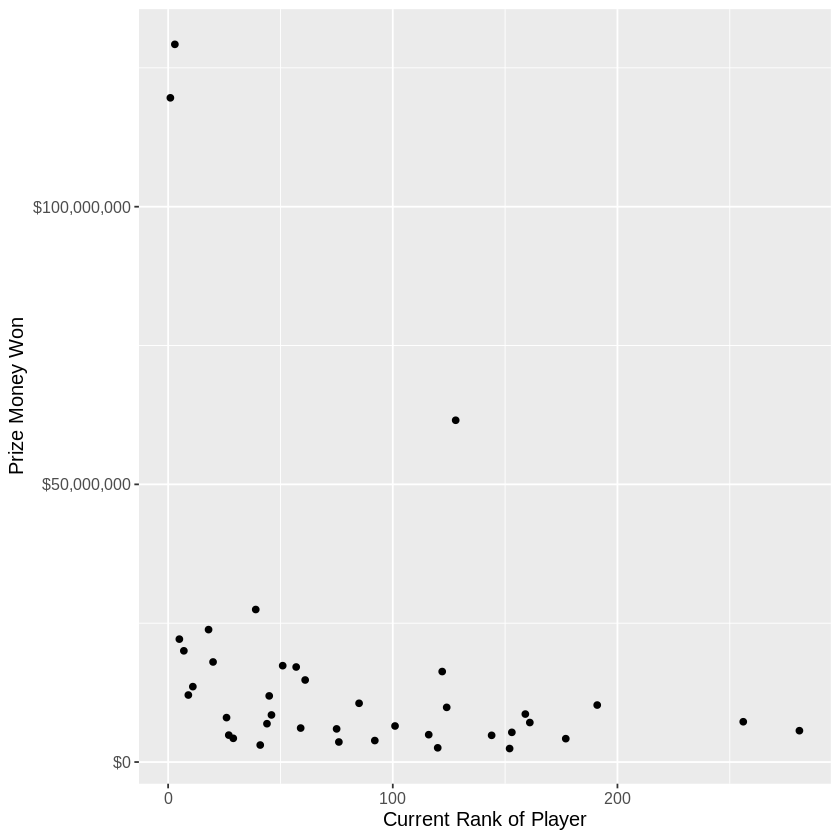

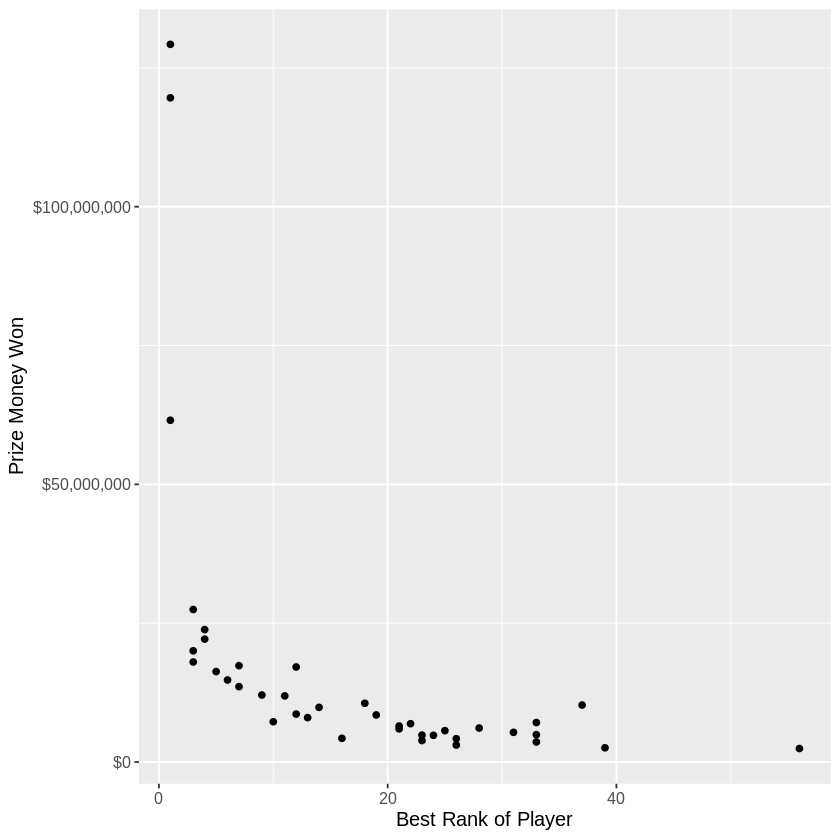

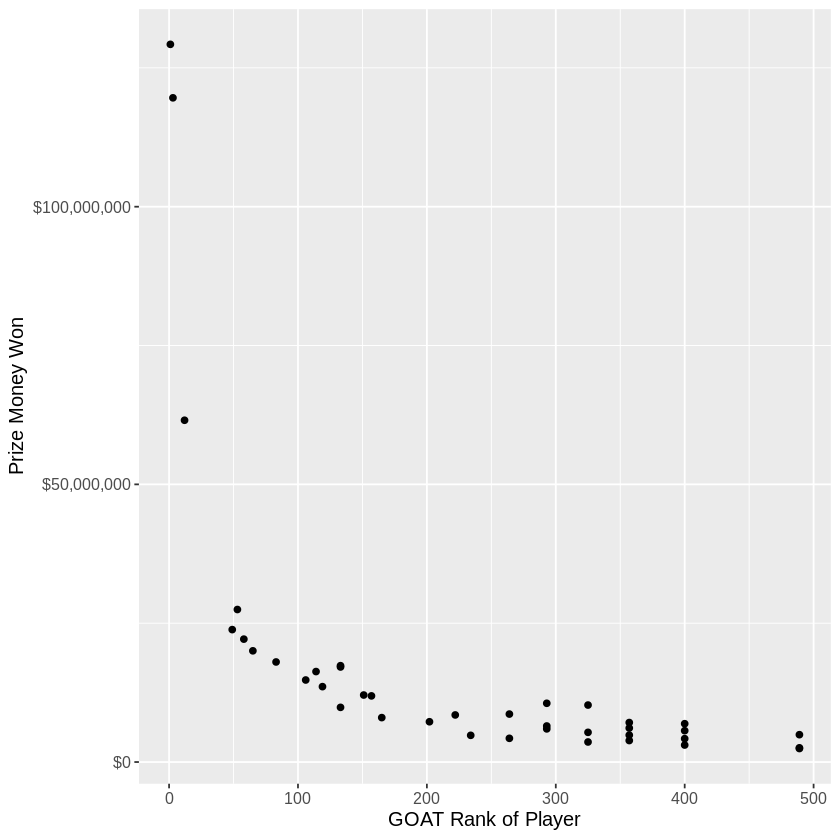

In [7]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(GGally)
library(gridExtra)

player_stats <- read_csv("data")

colnames(player_stats) <- make.names(colnames(player_stats), unique = TRUE)
player_stats_tidy <- player_stats |> filter(Active == "Yes", Current.Elo.Rank != "N/A", Height != "N/A", GOAT.Rank != "N/A") |> 
                                     select(Age, Seasons, Current.Elo.Rank, Best.Elo.Rank, Peak.Elo.Rating, Height, Current.Rank, Best.Rank, GOAT.Rank, Prize.Money) |> 
                                     mutate(Age = as.numeric(substr(Age, 1,2)), 
                                            Current.Rank = as.numeric(gsub("\\(.*?\\)", "", Current.Rank)),
                                            Best.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Rank)),
                                            Height = as.numeric(gsub("cm", "", Height)),
                                            Peak.Elo.Rating = as.numeric(gsub("\\(.*?\\)", "", Peak.Elo.Rating)),
                                            GOAT.Rank = as.numeric(gsub("\\(.*?\\)", "", GOAT.Rank)),
                                            Best.Elo.Rank = as.numeric(gsub("\\(.*?\\)", "", Best.Elo.Rank)),
                                            Current.Elo.Rank = as.numeric(gsub("[\\(\\)]", "", regmatches(Current.Elo.Rank, gregexpr("\\(.*?\\)", Current.Elo.Rank)))),
                                            Prize.Money = parse_number(Prize.Money))
player_stats_tidy

player_cor <- cor(player_stats_tidy)
player_cor[ , 10]

player_stats_split <- initial_split(player_stats_tidy, prop = 0.6, strata = Prize.Money)
player_stats_train <- training(player_stats_split)
player_stats_test <- testing(player_stats_split)

player_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")
player_recipe <- recipe(Prize.Money ~ Seasons + Current.Rank + Best.Rank
                        + Peak.Elo.Rating + GOAT.Rank + Best.Elo.Rank + Current.Elo.Rank,
                        data = player_stats_train)
player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(player_stats_train)
player_fit


player_age_plot <- ggplot(player_stats_train, aes(x = Age, y = Prize.Money)) +
  geom_point() +
  xlab("Age of Player (years)") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_seasons_plot <- ggplot(player_stats_train, aes(x = Seasons, y = Prize.Money)) +
  geom_point() +
  xlab("Total Seasons Played") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_elo_plot <- ggplot(player_stats_train, aes(x = Current.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_best_elo_plot <- ggplot(player_stats_train, aes(x = Best.Elo.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_peak_elo_plot <- ggplot(player_stats_train, aes(x = Peak.Elo.Rating, y = Prize.Money)) +
  geom_point() +
  xlab("Peak Elo of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  scale_x_discrete(breaks = seq(from = 0, to = 2406, by = 20)) +
  theme(text = element_text(size = 10)) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

player_height_plot <- ggplot(player_stats_train, aes(x = Height, y = Prize.Money)) +
  geom_point() +
  xlab("Height of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_current_rank_plot <- ggplot(player_stats_train, aes(x = Current.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Current Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_best_rank_plot <- ggplot(player_stats_train, aes(x = Best.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("Best Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_goat_rank_plot <- ggplot(player_stats_train, aes(x = GOAT.Rank, y = Prize.Money)) +
  geom_point() +
  xlab("GOAT Rank of Player") +
  ylab("Prize Money Won") + 
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 12))

player_age_plot
player_seasons_plot
player_current_elo_plot
player_best_elo_plot
player_peak_elo_plot 
player_height_plot
player_current_rank_plot
player_best_rank_plot
player_goat_rank_plot

We will predict how much money a player can make using the columns Age, Season, and Current Elo, as predictors. Our general procedure to tidy the data would first be to select the predicting columns, as well as tidy the observations to single data types. The next step taken would be to filter for active tennis players, and plot the prize money column as a function of each predictor. This would determine how each predictor affects the prize money, and could help determine if we chose correctly when selecting for predictors we thought would have the greatest effect on the outcome, prize money. After the predictor has been made, we can visualise the results as an accuracy number of our predictor on the testing data. 

The expected outcome is that as Age, Current Elo, and Seasons increase, the prize money will also increase. This is because having a higher value for Age/Seasons means a player has more experience and more opportunities to earn prize money. In addition, since Current Elo is a measure of strength (in terms of tennis), it’s reasonable to assume that stronger players will make more money than weaker players. The findings from this analysis will lay the groundwork for determining how much a player can make depending on how long and well they play. This could impact the number of people that choose to pursue a tennis career, as they’ll have a clearer image of how much money they’ll make. An example of a question these outcomes could lead to is: “Are current players being paid accordingly based on their age, Elo, and seasons? Which players are being underpaid and which are overpaid?”